__7.FINDING BEST PARAMETER__

now we will find best parameter for models

_models to discover_


SVM classifier

Random Forest Classifier

XGBoost Classifier

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
dataset = pd.read_csv(r"D:\#PROJECTS\Road Accident Severity Prediction System\Road.csv\Road_encoded.csv")
dataset.head()

df = pd.DataFrame(dataset)
df.tail()

,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,2,3,3,0.5,2,0.1,0.9,0,0.1,0.1,0.1,0.1,3,0.1,0.2,2,0.1,0.1,0.9,0
12312,1,2,4,0.1,2,0.1,0.9,1,0.3,0.1,0.1,0.1,3,0.1,0.2,2,1.1,0.1,0.9,0
12313,3,3,4,1.3,2,0.1,0.9,1,0.6,0.1,0.1,0.1,3,0.1,0.2,1,1.1,0.1,0.4,1
12314,1,3,5,0.3,2,0.1,0.2,0,0.6,0.1,0.1,0.1,2,0.1,0.2,2,1.1,0.1,1.8,0
12315,1,3,4,1.2,2,0.1,0.9,0,0.6,0.4,0.1,0.1,2,0.1,0.2,2,0.9,0.3,0.4,0


In [28]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
x = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7389, 19)
X_test shape: (4927, 19)
y_train shape: (7389,)
y_test shape: (4927,)


In [30]:
param_grid_rf = {
    'n_estimators': [100, 200],          # number of trees
    'max_depth': [None,5,2, 10],          # depth of each tree
    'min_samples_split': [2,10],          # min samples to split node
    'min_samples_leaf': [2, 4],            # min samples in leaf
    'max_features': ['sqrt', 'log2', None],   # features considered for split
    'bootstrap': [True, False]                # bootstrap samples
}


param_grid_xgb = {
    'n_estimators': [100],         # number of boosting rounds
    'max_depth': [3, 5, 7 , 6 , 8] ,                  # tree depth
    'learning_rate': [0.01, 0.05],     # step size shrinkage
    'subsample': [0.8, 1.0],           # row sampling
    'colsample_bytree': [0.7, 1],    # feature sampling
    'gamma': [0, 0.1,],                  # min loss reduction
    'reg_alpha': [0.01, 0.1],             # L1 regularization
    'reg_lambda': [1, 1.5, 2]                # L2 regularization
}

param_dist = {
    'svc__C': [0.1, 1, 10, 50, 100],
    'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'svc__degree': [2, 3, 4],           # only used for 'poly' kernel
    'svc__gamma': ['scale', 'auto'],
    'svc__class_weight': [None, 'balanced']
}

In [31]:
from sklearn.model_selection import GridSearchCV


#RandomForestClassifier


rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                       cv=5, scoring='accuracy', n_jobs=-1, verbose=2
                        )
# grid_rf.fit(X_train, y_train)

# print("Best RF Parameters:", grid_rf.best_params_)
# print("Best RF Accuracy:", grid_rf.best_score_)


"""
Best RF Parameters: {'bootstrap': False, 'max_depth': 2, 'max_features':                  13m 34s (960 fits)
None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
"""

"\nBest RF Parameters: {'bootstrap': False, 'max_depth': 2, 'max_features':                  13m 34s (960 fits)\nNone, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}\n"

In [32]:
#XGBoost Classifier


xgb = XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), use_label_encoder=False, eval_metric='mlogloss')
grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb,
                        cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
# grid_xgb.fit(X_train, y_train)

# print("Best XGB Parameters:", grid_xgb.best_params_)
# print("Best XGB Accuracy:", grid_xgb.best_score_)


"""
Best XGB Parameters: {'colsample_bytree': 0.7, 'gamma': 0, 
'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 0.01,            4m 30s(1200 fits)
'reg_lambda': 1, 'subsample': 0.8}

"""

"\nBest XGB Parameters: {'colsample_bytree': 0.7, 'gamma': 0, \n'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 0.01,            4m 30s(1200 fits)\n'reg_lambda': 1, 'subsample': 0.8}\n\n"

In [35]:
#Support Vector Classifier


from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Pipeline: scaling + SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=2,            # number of random combinations to try
    cv=5,
    scoring='accuracy',
    n_jobs=-1,           
    verbose=2,
    random_state=42
)

# random_search.fit(X_train, y_train)

# print("Best SVC Params:", random_search.best_params_)
# print("Best SVC Accuracy:", random_search.best_score_)

"""
Best SVC Params: {'svc__kernel': 'poly', 
'svc__gamma': 'auto', 'svc__degree': 2, 'svc__class_weight': None, 'svc__C': 10}
"""

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best SVC Params: {'svc__kernel': 'poly', 'svc__gamma': 'auto', 'svc__degree': 2, 'svc__class_weight': None, 'svc__C': 10}
Best SVC Accuracy: 0.8511301389002137


'\n                                                                             (250 fits)\n'

fitting best models

In [36]:
#random forest classifier
model_1 = RandomForestClassifier(
    n_estimators=100,
    max_depth=2,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features=None,
    bootstrap=False,
    random_state=42
)
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)

print(f"\n\n\n{round(model_1.score(X_test, y_test)*100 , 2)}% accuracy achieved using Random Forest Classifier of test data")
print(f"{round(model_1.score(X_train, y_train)*100 , 2)}% accuracy achieved using Random Forest Classifier of train data")


#XGBoost Classifier
model_2 = XGBClassifier(
    colsample_bytree=0.7,
    gamma=0,
    learning_rate=0.01,
    max_depth=5,
    n_estimators=100,
    reg_alpha=0.01,
    reg_lambda=1,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric='logloss'
)
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)    

print(f"\n\n\n{round(model_2.score(X_test, y_test)*100 , 2)}% accuracy achieved using XGBoost Classifier of test data")
print(f"{round(model_2.score(X_train, y_train)*100 , 2)}% accuracy achieved using XGBoost Classifier of train data")





#SVM Classifier
model_3 = SVC(
    kernel='poly',
    degree=2,
    gamma='auto',
    C=10,  
    class_weight=None,
    probability=True,  # needed if you want predict_proba for ROC
    random_state=42
)
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)

print(f"\n\n\n{round(model_3.score(X_test, y_test)*100 , 2)}% accuracy achieved using SVM Classifier of test data")
print(f"{round(model_3.score(X_train, y_train)*100 , 2)}% accuracy achieved using SVM Classifier of train data")




83.84% accuracy achieved using Random Forest Classifier of test data
85.28% accuracy achieved using Random Forest Classifier of train data


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:12:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)





83.78% accuracy achieved using XGBoost Classifier of test data
85.53% accuracy achieved using XGBoost Classifier of train data



83.68% accuracy achieved using SVM Classifier of test data
85.15% accuracy achieved using SVM Classifier of train data


__8.Visualizing MODELS__

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:22:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


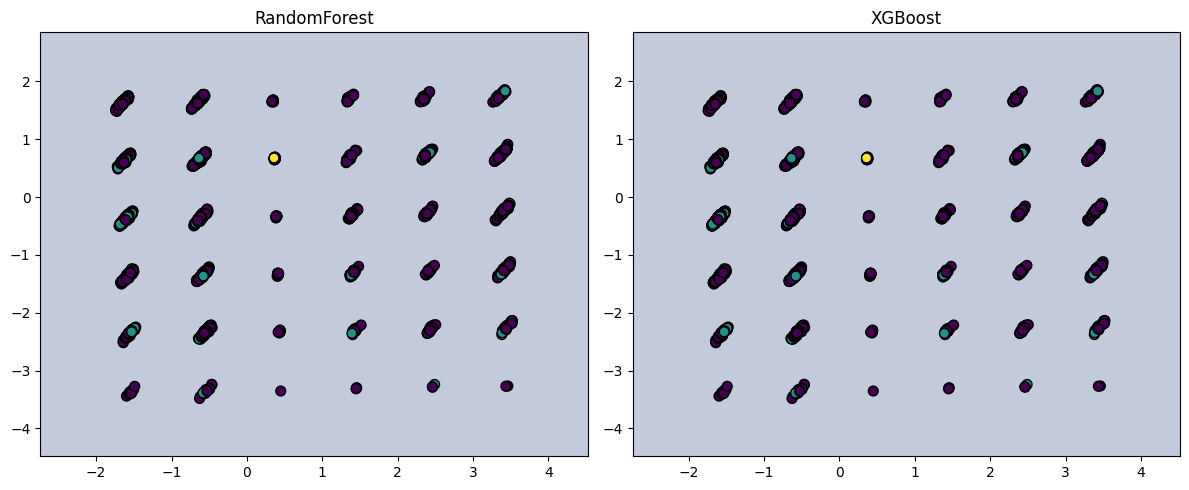

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA


if X_train.shape[1] > 2:
    pca = PCA(n_components=2)
    X_train_plot = pca.fit_transform(X_train)
    X_test_plot = pca.transform(X_test)
else:
    X_train_plot = X_train.values
    X_test_plot = X_test.values




models_main = {
    'RandomForest': RandomForestClassifier(
    n_estimators=100,
    max_depth=2,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features=None,
    bootstrap=False,
    random_state=42
),
    'XGBoost': XGBClassifier(
    colsample_bytree=0.7,
    gamma=0,
    learning_rate=0.01,
    max_depth=5,
    n_estimators=100,
    reg_alpha=0.01,
    reg_lambda=1,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric='logloss'
)
}

def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:,0], X[:,1], c=y, edgecolor='k', s=50)
    ax.set_title(title)

# Train and plot each model
fig, axes = plt.subplots(1, len(models_main), figsize=(12,5))

for ax, (name, model) in zip(axes, models_main.items()):
    model.fit(X_train_plot, y_train)
    plot_decision_boundary(model, X_test_plot, y_test, ax, name)

plt.tight_layout()
plt.show()


__9.Evaluate classification_report, confusion_matrix__

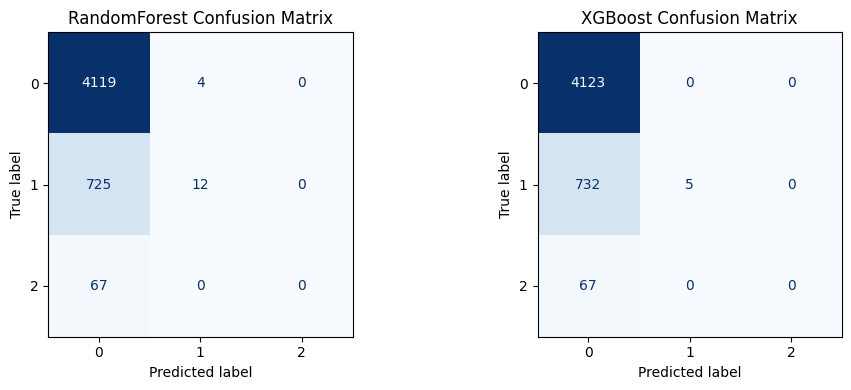

C:\Users\user\AppData\Local\Temp\ipykernel_9548\3600207086.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


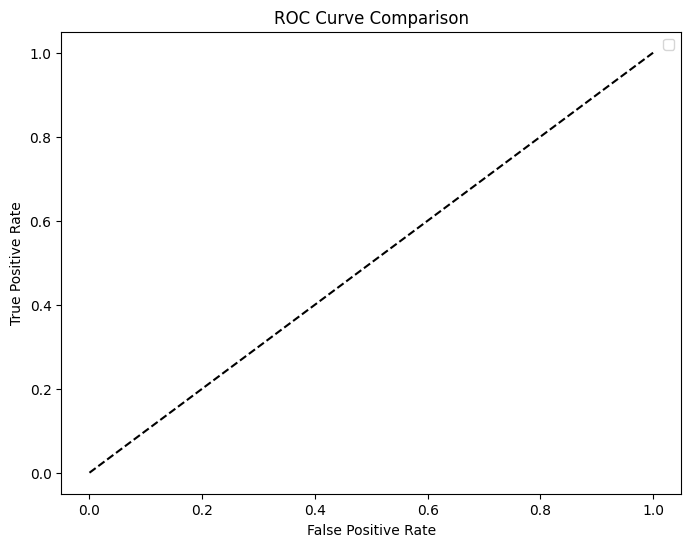

In [39]:
# ---------- 1. Confusion Matrix ----------
plt.figure(figsize=(15,4))
for i, (name, model) in enumerate(models_main.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(1,3,i+1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=plt.gca(), cmap=plt.cm.Blues, colorbar=False)
    plt.title(f'{name} Confusion Matrix')
plt.tight_layout()
plt.show()

# ---------- 2. ROC Curve ----------
plt.figure(figsize=(8,6))
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
for name, model in models_main.items():
    y_prob = model.predict_proba(X_test)
    if y_prob.shape[1] == 2:  # Binary
        fpr, tpr, _ = roc_curve(y_test_bin, y_prob[:,1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

__10.SAVING MODELS WITH JOBLIB__

In [43]:
import joblib
import os



filename_1 = 'random_forest_model_of_accident_project.pkl'
# joblib.dump(model_1, filename_1)

if os.path.exists(filename_1):
    print("Model saved successfully!")
else:
    print("Oops! Something went wrong. Model not saved.")





filename_2 = 'XGBoost_model_of_accident_project.pkl'
# joblib.dump(model_2, filename_2)

if os.path.exists(filename_2):
    print("Model saved successfully!")
else:
    print("Oops! Something went wrong. Model not saved.")





filename_3 = 'SVM_model_of_accident_project.pkl'
# joblib.dump(model_3, filename_3)

if os.path.exists(filename_3):
    print("Model saved successfully!")
else:
    print("Oops! Something went wrong. Model not saved.")

Model saved successfully!
Model saved successfully!
Model saved successfully!
